## Title: Customer Transactions

#### Data Analyzed by: Kwabena Boateng

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder 

### LOAD DATASET

In [2]:
customer_transactions = pd.read_csv("C:/Users/KWABENABOATENG/Desktop/DATA ANALYSIS/PERSONAL/CUSTOMER TRANSACTIONS PROJECT/sample_dataset.csv")

customer_transactions

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics
...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market
49996,800560,Anna,Allen,F,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic
49997,133285,Nicole,Franklin,M,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market
49998,616122,Maria,Keller,M,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market


### DATA UNDERSTANDING AND PREPARATION

#### CHECK NUMBER OF COLUMNS AND ROWS IN THE DATASET.

In [3]:
print('The number of rows and columns in this dataset is', customer_transactions.shape, 'respectively')

The number of rows and columns in this dataset is (50000, 9) respectively


#### CHECK THE STRUCTURE OF THE DATASET

In [4]:
customer_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


#### CHECK FOR MISSING VALUES

In [5]:
customer_transactions.isna().sum()

Customer ID              0
Name                     0
Surname                  0
Gender                5047
Birthdate                0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
dtype: int64

In [6]:
Total_MV = customer_transactions.isna().sum().sum()
print('The total number of missing values in this dataset is', Total_MV)

The total number of missing values in this dataset is 5047


#### INSIGHTS

From the above charts and results, it shows clearly that the Gender column is the only column with missing values.

In [7]:
customer_transactions['Gender'].unique()

array(['F', nan, 'M'], dtype=object)

In [8]:
customer_transactions['Gender'].value_counts()

Gender
F    22713
M    22240
Name: count, dtype: int64

#### DEALING WITH THE MISSING VALUES IN THE GENDER COLUMN

In [9]:
#Check for the percentage for the missing values.

missing_gender = customer_transactions['Gender'].isnull().sum()
total_rows = len(customer_transactions)
missing_percentage = (missing_gender / total_rows) * 100

print(f"Missing Gender Values: {missing_gender} ({missing_percentage:.2f}%)")

Missing Gender Values: 5047 (10.09%)


#### INSIGHTS

Due to the percentage of the missing values in the Gender columns, we can't afford to delete those rows.
We will rather replace the missing values with NOT SURE.
This presupposes that these customers didn't have the option to select their preferred gender hence they left that field empty.
After this, we can now encode our Gender column.

In [10]:
#Replace missing values in the gender column with undefined.

customer_transactions['Gender'].fillna('Undefined', inplace=True)

In [11]:
#Replace gender initials with the full word.

customer_transactions['Gender'] = customer_transactions['Gender'].replace('M', 'Male')
customer_transactions['Gender'] = customer_transactions['Gender'].replace('F', 'Female')

In [12]:
customer_transactions['Gender'].unique()

array(['Female', 'Undefined', 'Male'], dtype=object)

In [13]:
#Check the unique values on the Merchant column.

customer_transactions['Merchant Name'].unique()

array(['Smith-Russell', 'Peck, Spence and Young', 'Steele Inc', ...,
       'Cantrell, Haynes and Ballard', 'Wilson, Jackson and Beard',
       'Combs LLC'], dtype=object)

In [14]:
#Check the value_counts on the Merchant column.

customer_transactions['Merchant Name'].value_counts()

Merchant Name
Smith Ltd                     69
Smith Group                   65
Smith PLC                     65
Smith Inc                     60
Smith LLC                     60
                              ..
Lam, May and Lucas             1
Chan-Johnson                   1
Yang-Rodgers                   1
Richmond, Watson and Smith     1
Combs LLC                      1
Name: count, Length: 36939, dtype: int64

In [15]:
customer_transactions['Category'].unique()

array(['Cosmetic', 'Travel', 'Clothing', 'Electronics', 'Restaurant',
       'Market'], dtype=object)

In [16]:
customer_transactions['Category'].value_counts()

Category
Restaurant     8413
Market         8382
Travel         8377
Electronics    8324
Clothing       8261
Cosmetic       8243
Name: count, dtype: int64

#### CHECK FOR DUPLICATE ROWS

In [17]:
Total_dup = customer_transactions.duplicated().sum()
print('The total number of duplicate rows in this dataset is', Total_dup)

The total number of duplicate rows in this dataset is 0


### EXPLORATORY DATA ANALYSIS, (E.D.A)

#### MAKE A COPY OF THE ORIGINAL DATASET.

In [18]:
customer_transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,50000.0,500136.796960,288232.431640,29.00,251191.5000,499520.500,749854.250,999997.00
Transaction Amount,50000.0,442.119239,631.669724,5.01,79.0075,182.195,470.515,2999.88


In [19]:
customer_transactions.describe(include='object').T

,count,unique,top,freq
Name,50000,690,Michael,1167
Surname,50000,1000,Smith,1095
Gender,50000,3,Female,22713
Birthdate,50000,58,1954-11-01,914
Date,50000,287,2023-06-30,200
Merchant Name,50000,36939,Smith Ltd,69
Category,50000,6,Restaurant,8413


In [20]:
customer_transactions_copy = customer_transactions.copy

In [21]:
Cols_drop = ['Customer ID', 'Surname']
customer_transactions = customer_transactions.drop(columns= Cols_drop)

### INSIGHTS TO BE DERIVED FROM THIS ANALYSIS

#### QUESTIONS
 - What is the percentage for the various gender in the gender column? 
 - What is the total amount generated by each category?
 - What is the total amount generated by the various gender in connection to the category?
 - What is the amount generated by each merchant.
 - The trend in the transactions

#### QUESTION ONE

###### - What is the percentage for the various gender in the gender column? 

In [22]:
#Get the value counts for each gender

customer_transactions['Gender'].value_counts()

Gender
Female       22713
Male         22240
Undefined     5047
Name: count, dtype: int64

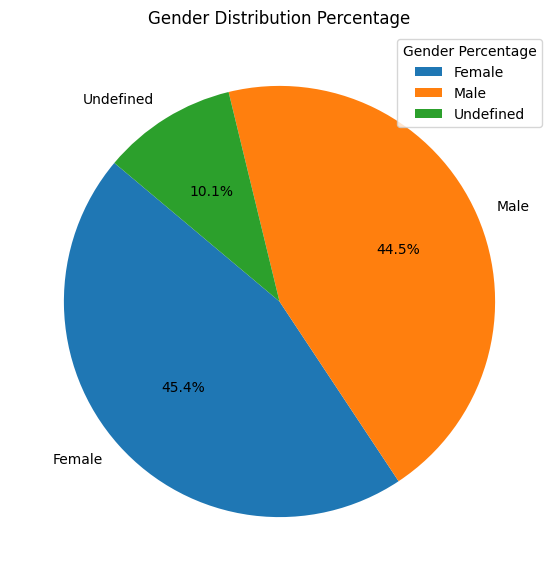

In [23]:
#Plot the above results into a pie chart.

gender_counts = customer_transactions['Gender'].value_counts()

total_count = len(customer_transactions)

gender_percentages = (gender_counts / total_count) * 100


# Create a pie chart
plt.figure(figsize=(7, 7))

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Gender Distribution Percentage')

# Add a legend
plt.legend(gender_percentages.index, title="Gender Percentage")

plt.show()



#### INSIGHTS

There are six (6) categories in this dataset namely, Cosmetic, Travel, Clothing, Electronics, Restaurant and Market.

Below are their outputs / results in descending order:

- Restaurant  - 8413 - 16.8%
- Market      - 8382 - 16.8%
- Travel      - 8377 - 16.8%
- Electronics - 8324 - 16.6%
- Clothing    - 8261 - 16.5%
- Cosmetic    - 8243 - 16.5%

#### QUESTION TWO

###### - What is the total amount generated by each category? 

      Category  Transaction Amount
0     Clothing          1319342.47
1     Cosmetic           876672.44
2  Electronics          4394092.10
3       Market          2151134.42
4   Restaurant           464488.60
5       Travel         12900231.94


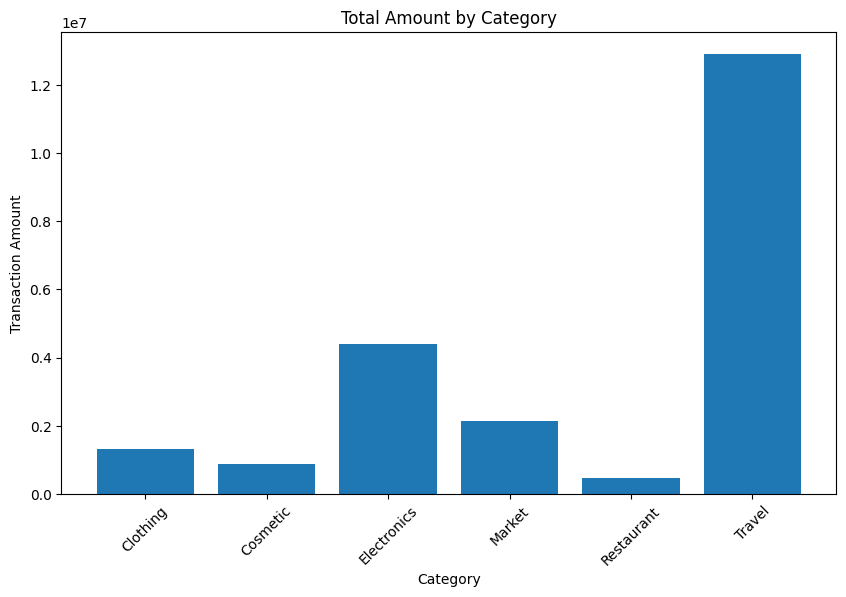

In [24]:
# Calculate the total amount for each category
category_totals = customer_transactions.groupby('Category')['Transaction Amount'].sum().reset_index()

# Display the result
print(category_totals)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_totals['Category'], category_totals['Transaction Amount'])
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.title('Total Amount by Category')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

#### QUESTION THREE

###### - What is the total amount generated by the various gender in connection to the category?

In [25]:
gender_category_totals = customer_transactions.groupby(['Gender', 'Category'])['Transaction Amount'].sum().reset_index()
gender_category_totals 

,Gender,Category,Transaction Amount
0,Female,Clothing,587938.88
1,Female,Cosmetic,407487.58
2,Female,Electronics,1977312.00
3,Female,Market,959849.62
4,Female,Restaurant,211185.65
5,Female,Travel,5975346.51
6,Male,Clothing,594994.60
7,Male,Cosmetic,383398.72
8,Male,Electronics,1994008.68
9,Male,Market,960420.88


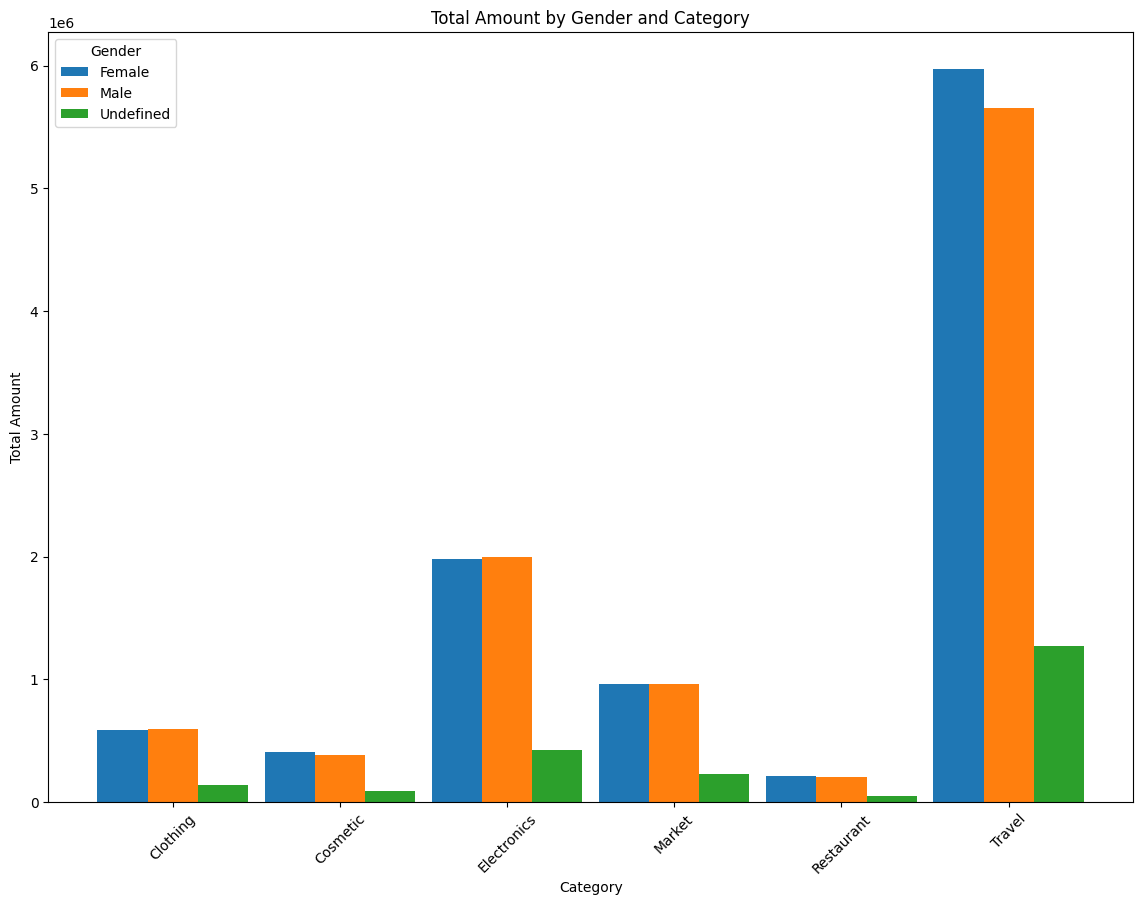

In [26]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Grouped bar chart
category_names = gender_category_totals['Category'].unique()
width = 0.30
x = range(len(category_names))

for i, gender in enumerate(gender_category_totals['Gender'].unique()):
    gender_data = gender_category_totals[gender_category_totals['Gender'] == gender]
    amounts = gender_data['Transaction Amount']
    plt.bar([pos + i * width for pos in x], amounts, width, label=gender)

plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.title('Total Amount by Gender and Category')
plt.xticks([pos + width for pos in x], category_names)
plt.legend(title='Gender')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

#### QUESTION FOUR

###### - What is the amount generated by each merchant.

In [ ]:
merchant_totals = customer_transactions.groupby(['Merchant Name'])['Transaction Amount'].sum().reset_index()
merchant_totals

In [ ]:
#ax = sns.countplot(customer_transactions, x='Gender')

#for bars in ax.containers:
    
      #ax.bar_label(bars)
        
#plt.title('Distribution of Gender')

#plt.ylabel('Gender Count')

#plt.show()

In [ ]:
#gender_counts = customer_transactions['Gender'].value_counts()

# Create a pie chart
#plt.figure(figsize=(6, 6))
#plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title and legend
#plt.title('Percentage of Gender Column')
#plt.legend(gender_counts.index, loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the pie chart
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.show()

#### Total amount generated by each category

In [ ]:
# Sample data representing customer transactions with categories and amounts
#data = {
   # "Category": ["Electronics", "Clothing", "Electronics", "Clothing", "Books", "Books"],
   # "Transaction Amount": [1000, 500, 800, 300, 200, 150]
#}

# Create a DataFrame from the data
customer_transactions = pd.DataFrame(customer_transactions)

# Initialize an empty dictionary to store the total amount for each category
category_totals = {}

# Check the column names in the DataFrame
print(customer_transactions.columns)

# Calculate the total amount for each category
for index, row in customer_transactions.iterrows():
    category = ["Category"]  # Make sure "Category" is the correct column name
    amount = ["Transaction Amount"]
    # Check if the category is already in the dictionary, and if not, initialize it with the current amount
    if category not in customer_transactions:
        category_totals[Category] = amount
    else:
        # If the category is already in the dictionary, add the current amount to the existing total
        category_totals[Category] += amount

# Print the total amount for each category
for category, total_amount in category_totals.items():
    print(f"Category: {category}, Total Amount: ${total_amount}")


#### SHOW A SUMMARY STATISTICS OF THE AGE GROUP IN THE DATASET

In [ ]:
summary_stats = customer_transactions['Birthdate'].describe()
print(summary_stats)

#### CONVERT THE BIRTHDATE INTO A DATETIME TO PLOT IT OUT AS A GRAPH

In [ ]:
# Convert 'Birthdate' to datetime
customer_transactions['Birthdate'] = pd.to_datetime(customer_transactions['Birthdate'])

# Calculate age
current_date = pd.Timestamp.now()

customer_transactions['Age'] = (current_date - customer_transactions['Birthdate']).dt.days // 365  # Calculate age in years

# Define age bins and labels
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100]

age_labels = ['21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95']

# Apply age grouping
customer_transactions['AgeGroup'] = pd.cut(customer_transactions['Age'], bins=age_bins, labels=age_labels, right=False)

# Histogram
plt.figure(figsize=(10, 8))

sns.histplot(data=customer_transactions, x='AgeGroup', kde=True)

plt.title('Age Distribution')

plt.xlabel('Age Group')

plt.ylabel('Frequency')

plt.show()

#### UNIVARIATE ANALYSIS

In [ ]:
# Calculate the correlation coefficient
#correlation = customer_transactions['AgeGroup'].corr(customer_transactions['Gender'])
#print(f'Correlation coefficient: {correlation}')

#### BIVARIATE ANALYSIS

In [ ]:
#cross_tab = pd.crosstab(customer_transactions['Category'], customer_transactions['AgeGroup'])

# Create a heatmap to visualize the cross-tabulation
#plt.figure(figsize=(15, 8))

#sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

#plt.title('Bivariate Analysis: Age Group vs. Category')

#plt.xlabel('Category')

#plt.ylabel('Age Group')

#plt.show()

In [ ]:
# Summary statistics
#summary_stats = customer_transactions['Birthdate'].describe()
#print(summary_stats)

# Histogram
#plt.figure(figsize=(8, 5))
#sns.histplot(data=customer_transactions, x='Age', kde=True)
#plt.title('Age Distribution')
#plt.xlabel('Age')
#plt.ylabel('Frequency')
#plt.show()

# Box plot
#plt.figure(figsize=(10, 8))
#sns.boxplot(data=customer_transactions['Birthdate'], x='Age')
#plt.title('Box Plot of Age')
#plt.xlabel('Age')
#plt.show()